### Score: 29

Q1.[11]

Q2.[9+9]

第一题

In [2]:
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline


In [3]:
#导入数据
df = pd.read_csv(r'C:\Users\zjm\Desktop\ESE_5023\usgs_earthquakes.csv')
#筛选数据
df['time'] = pd.to_datetime(df['time'])
df_2014 = df[df['time'].dt.year == 2014]
df_2014_top50 = df_2014.sort_values(by='mag', ascending=False).head(50)

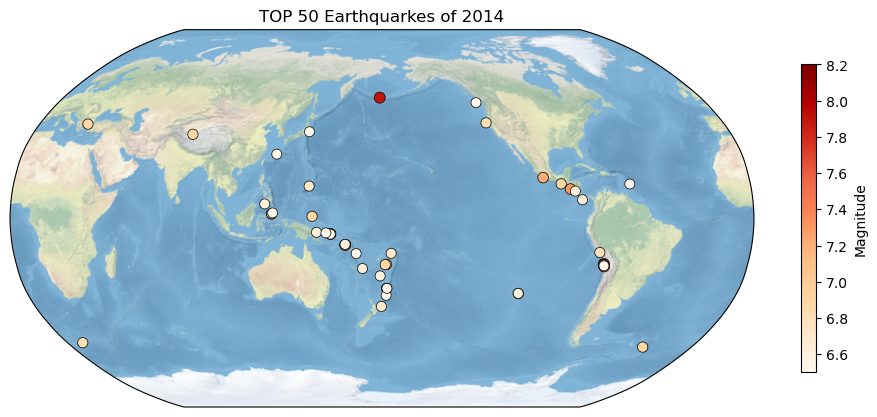

In [9]:
# 设置整个图形的大小
plt.figure(figsize=(12, 8))

#绘制地图
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.stock_img()

# 绘制数据点
ax.scatter(df_2014_top50['longitude'], df_2014_top50['latitude'], 
           c=df_2014_top50['mag'],       # 颜色映射到震级
           cmap='OrRd',    # 颜色映射方案
           s=8*df_2014_top50['mag'],   # 点的大小
           edgecolor='black',
           linewidths=0.5, #点边框的粗细
           transform=ccrs.PlateCarree())  # 确保经纬度使用PlateCarree投影

# 添加颜色条
cbar = plt.colorbar(ax.collections[0], ax=ax, orientation='vertical', label='Magnitude', shrink=0.5)
cbar.locator = ticker.MultipleLocator(0.2)
# 设置地图属性
ax.set_title('TOP 50 Earthquarkes of 2014')
#ax.gridlines(draw_labels=True)
    
plt.show()

思考：2014年地震多发在太平洋上的群岛，美洲西部沿海地区地震发生次数也多，并且都较强。

第二题

In [10]:
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from matplotlib import pyplot as plt

In [153]:
ds = xr.open_dataset("MERRA2_400.tavgU_3d_tdt_Np.202012.nc4.nc4", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:  (time: 8, lev: 42, lat: 361, lon: 576)
Coordinates:
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lev      (lev) float64 1e+03 975.0 950.0 925.0 900.0 ... 0.7 0.5 0.4 0.3 0.1
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * time     (time) datetime64[ns] 2020-12-01T01:30:00 ... 2020-12-01T22:30:00
Data variables:
    DTDTGWD  (time, lev, lat, lon) float32 ...
Attributes: (12/32)
    Contact:                           http://gmao.gsfc.nasa.gov
    History:                           Original file generated: Wed Jan 13 02...
    Filename:                          MERRA2_400.tavgU_3d_tdt_Np.202012.nc4
    Comment:                           GMAO filename: d5124_m2_jan10.tavg3_3d...
    Source:                            CVS tag: GEOSadas-5_12_4_p25_SLES12_M2...
    Conventions:                       CF-1
    ...                                ...
    DataResolution:                    0.5 x 0.625 (42 pressure levels)
    identifier_product_doi:            10.5067/QPO9E5TPZ8OF
    RangeBeginningTime:                00:00:00.000000
    RangeEndingTime:                   23:59:59.000000
    DODS_EXTRA.Unlimited_Dimension:    time
    history:                           2024-12-03 03:26:26 GMT Hyrax-1.16.3 h...

第（1）题

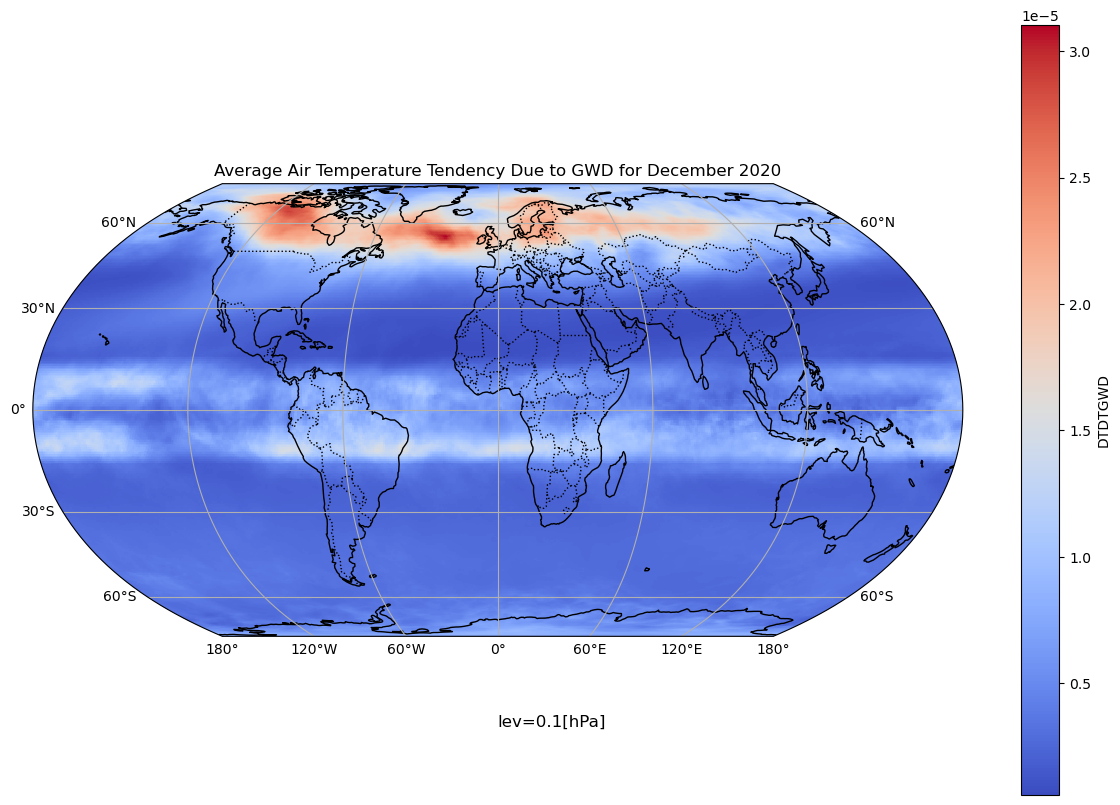

In [275]:
# 选择DTDTGWD变量
data_var = ds['DTDTGWD']

# 计算整个月的平均值
monthly_mean = data_var.mean(dim='time')

# 选择一个垂直层级
monthly_mean_lev41 = monthly_mean.isel(lev=41)

# 设置绘图
plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.EqualEarth())
ax.coastlines(resolution='110m')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# 添加网格线
gl = ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.top_labels = False
gl.right_labels = False

# 绘制平均值数据
monthly_mean_lev41.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=True)

# 设置标题
ax.set_title('Average Air Temperature Tendency Due to GWD for December 2020')


# 添加文本框
plt.text(0.5, -0.2, 'lev=0.1[hPa]', transform=ax.transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0))


# 显示地图
# NOTE: 缺少注释 -1
plt.show()

思考：绘制了2020年12月时大气压力为0.1[hPa]时由于重力波拖曳（Gravity Wave Drag, GWD）这一物理过程导致的全球大气温度变化的趋势或速率。从图中可以看出在北寒带（大约50-70°左右）的大气温度变化的速率最快，赤道的大气温度变化较慢，其余地方都更慢（特别是北温带）

第（2）题

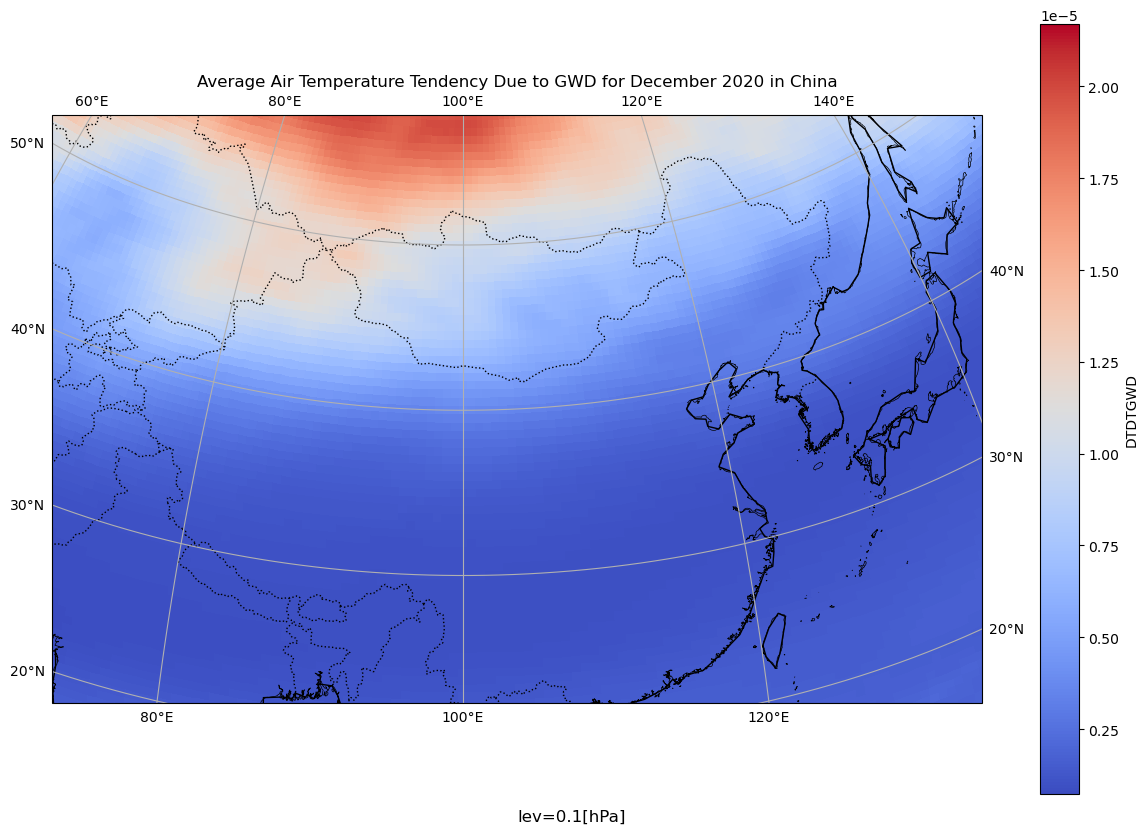

In [277]:

# 选择DTDTGWD变量
data_var = ds['DTDTGWD']

# 计算整个月的平均值
monthly_mean = data_var.mean(dim='time')

# 选择一个垂直层级
monthly_mean_lev41 = monthly_mean.isel(lev=41)

# 选择中国范围内的数据
china_data = monthly_mean_lev41.sel(lat=slice(15, 60), lon=slice(55, 155))

# 创建并定义图形对象的大小
plt.figure(figsize=(15, 10), dpi=100)

# 设置正射投影风格，使用中国的大致中心点
proj = ccrs.Orthographic(central_longitude=100, central_latitude=40)


# 创建具有正射投影风格的坐标轴
ax = plt.axes(projection=proj)
ax.coastlines(resolution='110m')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# 设置区域并绘制
extent = [73, 135, 18, 54]  # 中国的经纬度范围
ax.set_extent(extent)



# 添加特征到坐标轴使用方法
ax.coastlines(resolution='10m', linewidth=0.5)
ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)



# 绘制平均值数据
china_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=True)

# 设置标题
ax.set_title('Average Air Temperature Tendency Due to GWD for December 2020 in China')

# 添加文本框
plt.text(0.5, -0.2, 'lev=0.1[hPa]', transform=ax.transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0))

# 显示图形
# NOTE: 缺少注释 -1
plt.show()

思考：这是中国地区的大气温度变化趋势图，整体来看，中国的大气温度变化是较平稳的，但北方，特别是西北（新疆北部）的温度变化速率较大